# Customer Churn Analysis

# Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

we will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory data analysis

In [4]:
#cheking dimention of dataset
df.shape

(7043, 21)

In [5]:
#cheking type of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


So there is no null value in dataset

In [7]:
#checking number of unique values in dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

So above are the nuber of unique values that each column has.

<AxesSubplot:>

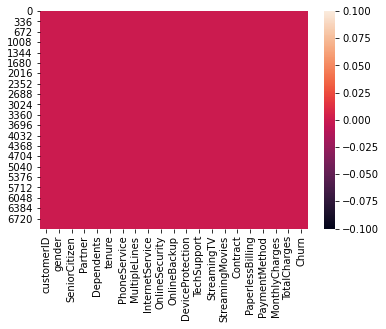

In [8]:
#since our dataset in cleaned that is no null value in the data set lets visualize this by heat map.
#Lets visualize null value clearly
sns.heatmap(df.isnull())

so clear that no missing value is present 

In [9]:
#cheking which columns are present in dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#list of values in target variable
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
#cheking uniqness of values in targer varible 
df["Churn"].unique

<bound method Series.unique of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object>

In [12]:
#cheking weather the dataset contains any spaces
df.loc[df["Churn"]==""]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


It seems there is no spaces in dataset

# Description of Data set

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


This gives statistical information of the dataset.There is no any negative or invalid values in dataset. so from above we can conclude There is no any null value since the count of all columns is same.

<AxesSubplot:>

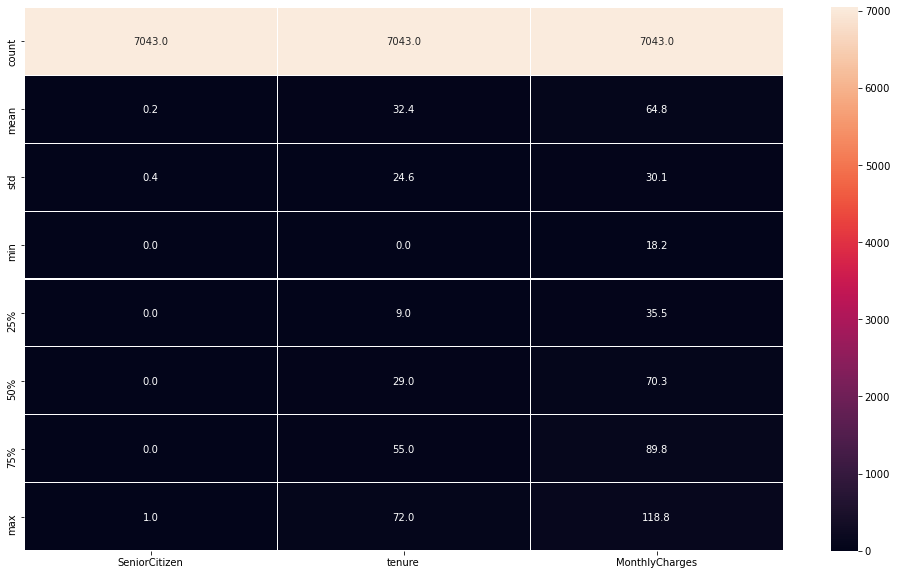

In [14]:
#visalizing from column from heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.describe(),linewidth=0.1,fmt="0.1f",annot=True)

# DATA VISUALIZATION

Text(0.5, 1.02, 'count of target variable per catogary')

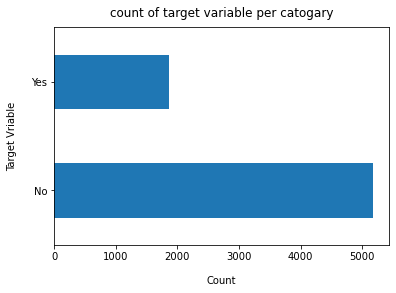

In [15]:
df['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count" ,labelpad=14)
plt.ylabel("Target Vriable", labelpad=14)
plt.title("count of target variable per catogary", y=1.02)

In [16]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalnced

so we analyase the data with other features

In [17]:
#Converting total charges object data type in to numeric
new_df = df.copy()


In [18]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

here 11 values are missing in dataset

In [19]:
new_df.loc[new_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


since percentage of missing data is very less as compared to the whole data so we will drop it.

In [20]:
#removing missing values
new_df.dropna(how='any' , inplace= True)

In [21]:
#get max tenure
print (new_df['tenure'].max())

72


In [22]:
labels = ["{0} - {1}" .format (i, i + 11) for i in range (1,72,12)]

new_df['tenure_group']= pd.cut(new_df.tenure, range (1 ,80,12), right= False , labels=labels)

In [23]:
new_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [24]:
#Removing columns which are not required
new_df.drop(columns=['customerID','tenure'], axis=1, inplace=True)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Univariate Analysis

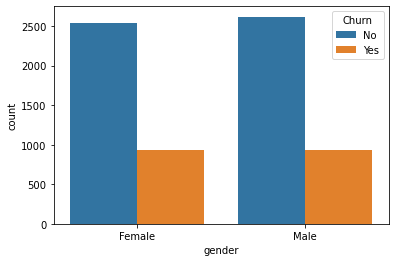

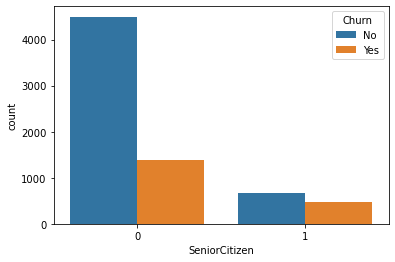

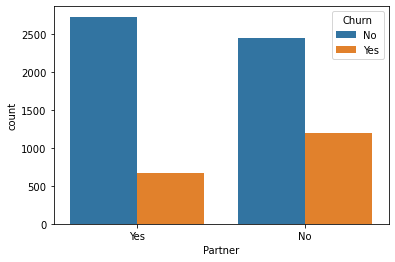

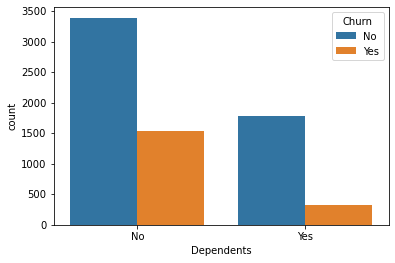

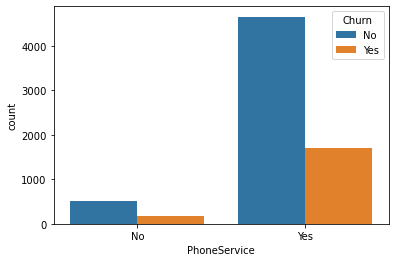

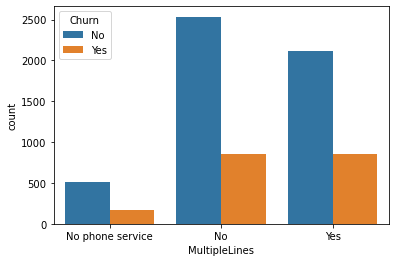

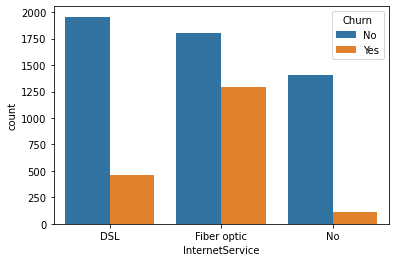

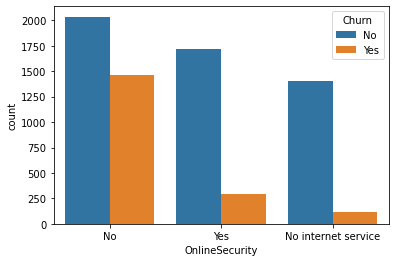

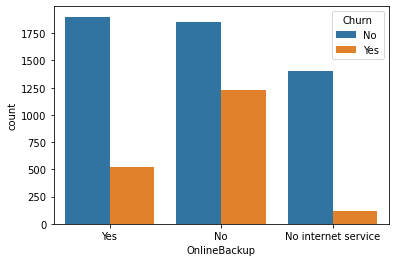

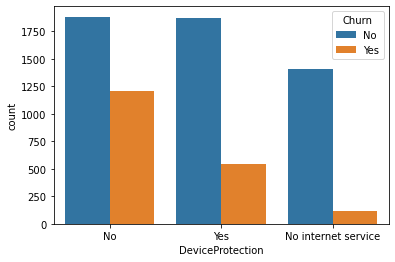

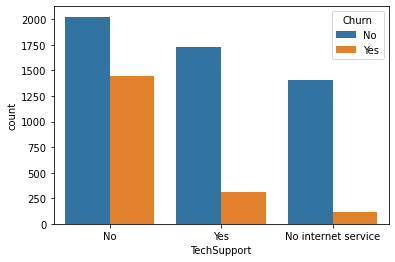

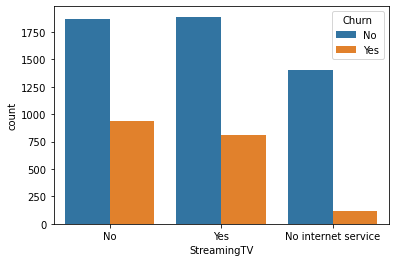

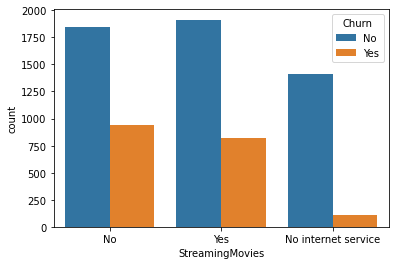

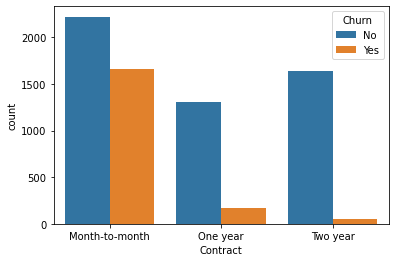

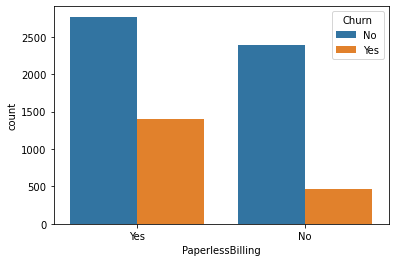

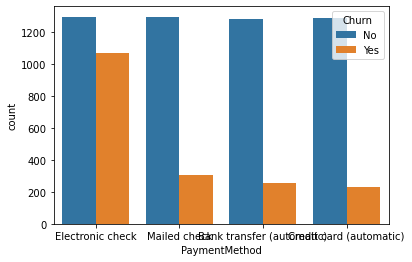

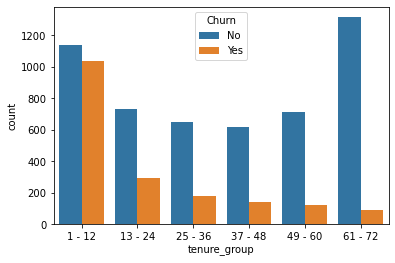

In [25]:
for i , predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue='Churn')

In [26]:
#converting target variable in to numeric 
new_df['Churn']= np.where(new_df.Churn =='Yes',1,0)

In [27]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [28]:
#converting all categorical variables
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


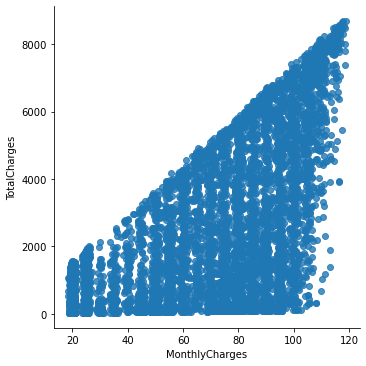

In [29]:
#lets chek the relationship between monthly charges and total charges 
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg= False)

Text(0.5, 1.0, 'MonthlyCharges by churn')

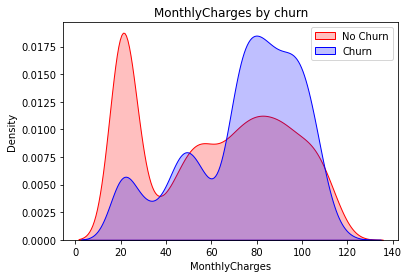

In [30]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] ==0)],
                 color="red", shade=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] ==1)],
                 color="blue", shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('MonthlyCharges')
Mth.set_title('MonthlyCharges by churn')

Here we can see that churn is high when monthly charges are high

Text(0.5, 1.0, 'TotalCharges by churn')

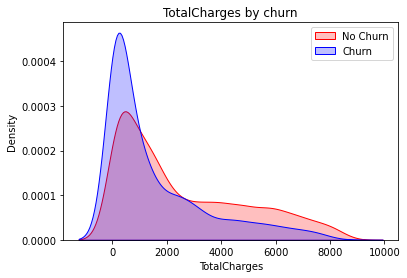

In [31]:
Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] ==0)],
                 color="red", shade=True)
Mth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] ==1)],
                 color="blue", shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('TotalCharges')
Mth.set_title('TotalCharges by churn')

In [32]:
new_df_dummies.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
SeniorCitizen,1.000000,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219874,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.042410,0.030055,0.271117,-0.376568,-0.191881,-0.047220,0.009465,0.017614,0.070048,0.185440
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.150541,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.001819,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.001819,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,0.006249,-0.020658,-0.004319,0.016279
Partner_No,-0.016957,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.305061,0.048481,-0.003131,-0.035092,-0.105341,-0.280353
Partner_Yes,0.016957,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_No,0.210550,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.145379,0.001459,-0.009289,-0.023544,-0.031419,-0.118090
Dependents_Yes,-0.210550,-0.112343,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.052369,0.061134,-0.149274,0.056448,-0.145379,-0.001459,0.009289,0.023544,0.031419,0.118090


<AxesSubplot:>

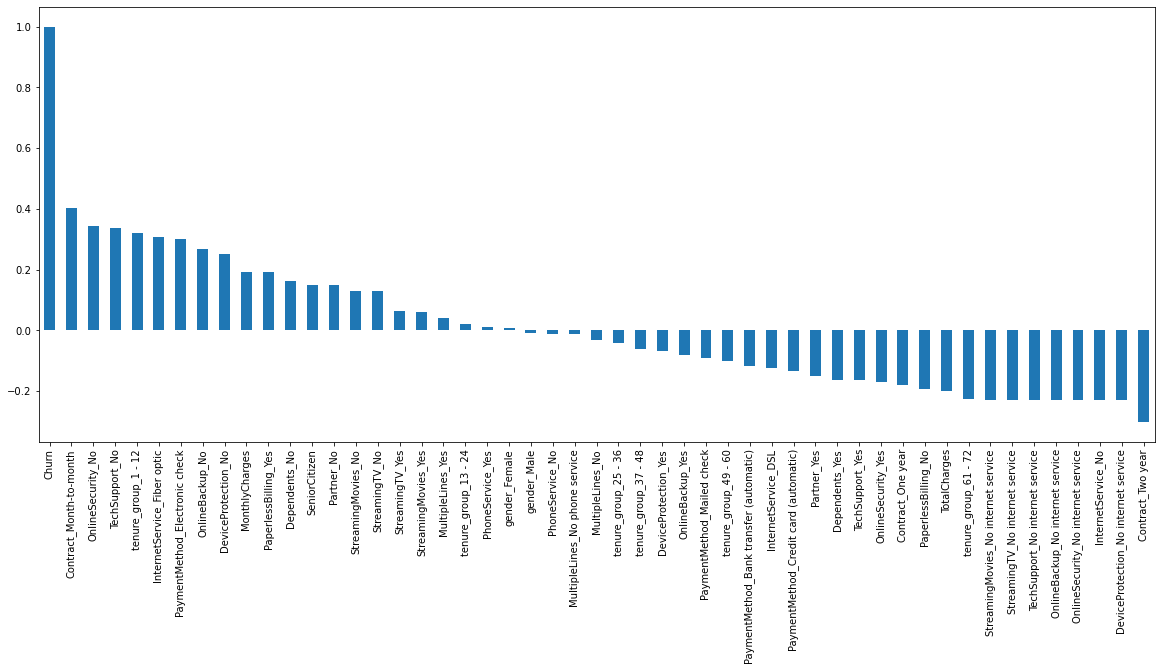

In [33]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

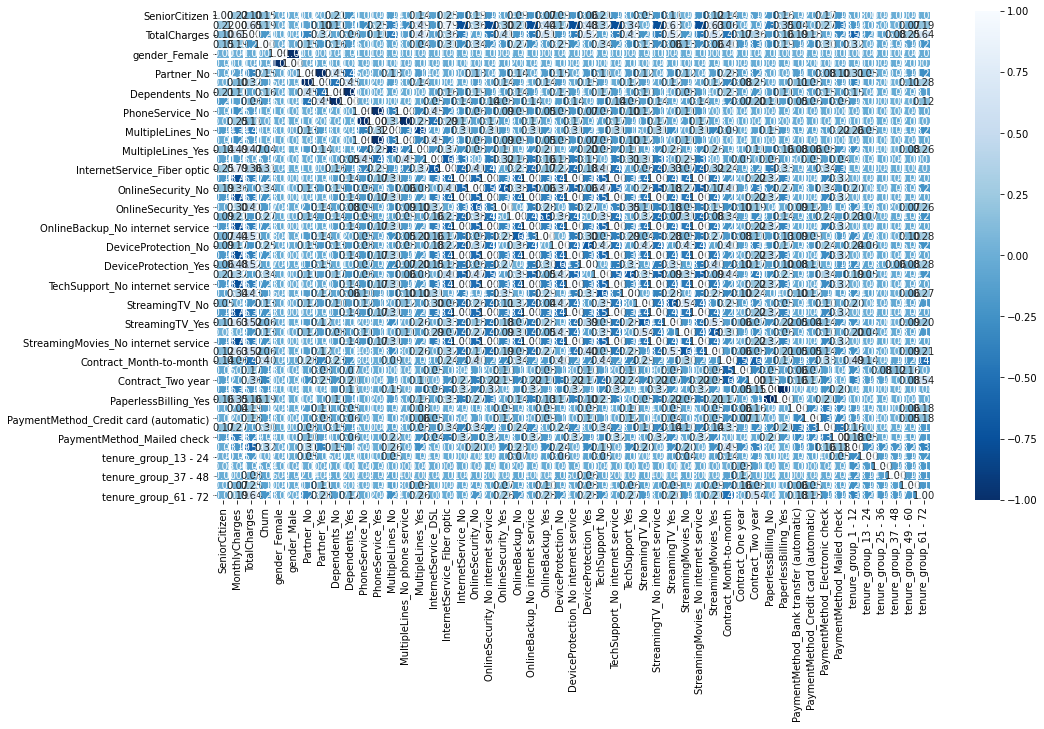

In [34]:
plt.figure(figsize=(16,9))
sns.heatmap(new_df_dummies.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

# Bivariate analysis

In [35]:
new_df1_target0 = new_df.loc[new_df["Churn"]==0]
new_df1_target1 = new_df.loc[new_df["Churn"]==1]

In [36]:
def uniplot ( df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    
    temp = pd.Series(data=hue)
    fig, ax= plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df, x=col, order=df[col].value_counts().index,hue = hue,palette='bright')
          
    plt.show
    

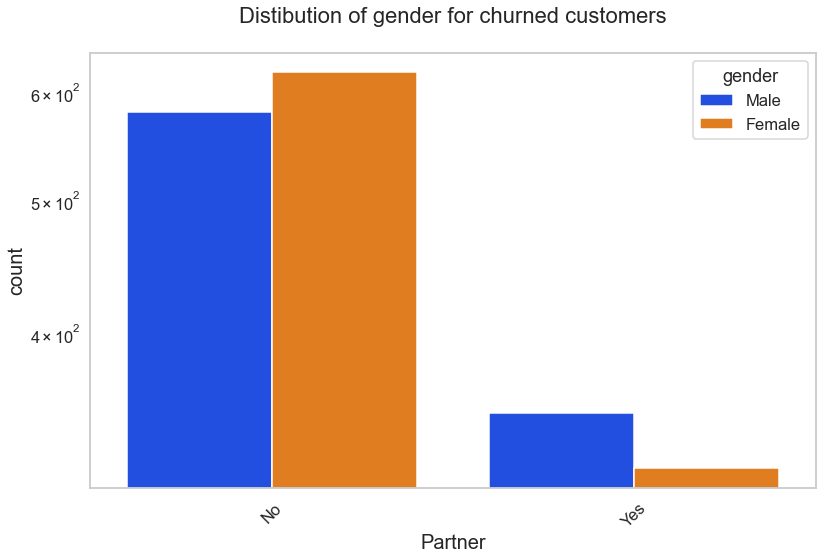

In [37]:
uniplot(new_df1_target1,col='Partner',title='Distibution of gender for churned customers', hue='gender')

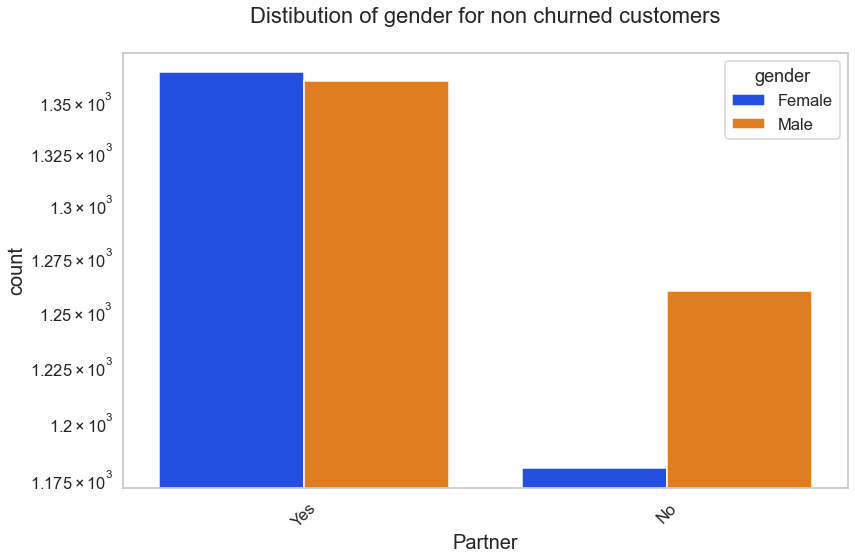

In [38]:
uniplot(new_df1_target0,col='Partner',title='Distibution of gender for non churned customers', hue='gender')

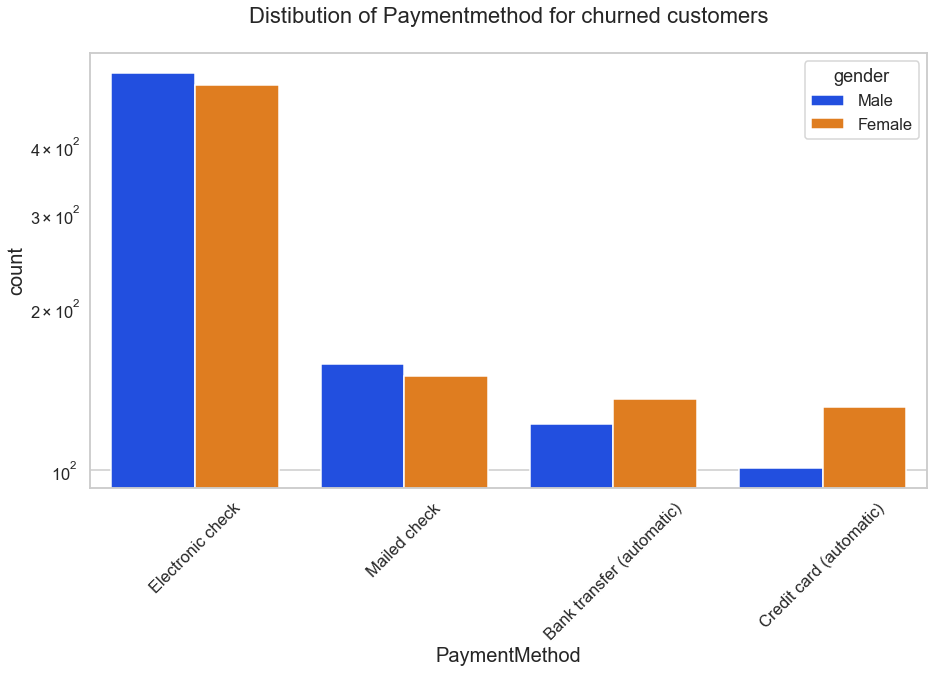

In [39]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distibution of Paymentmethod for churned customers', hue='gender')

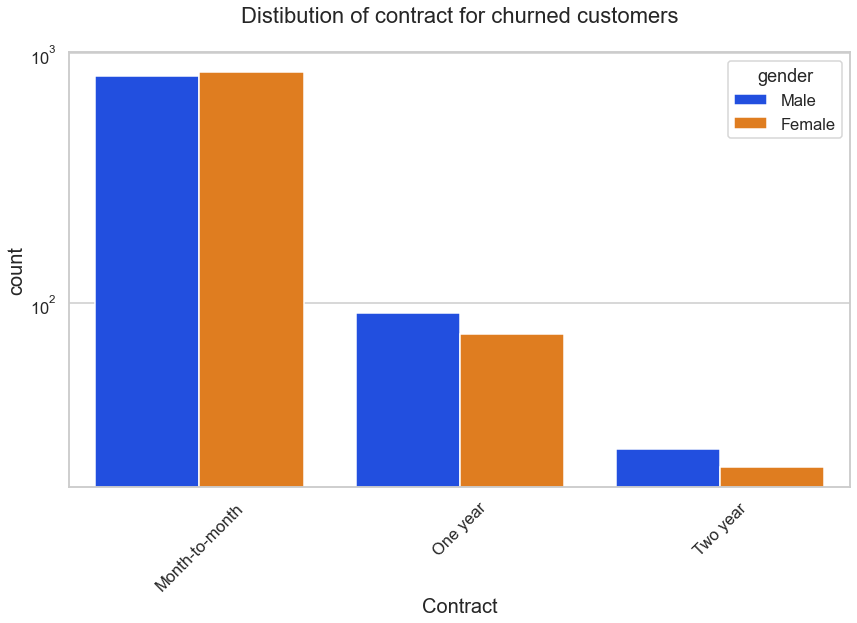

In [40]:
uniplot(new_df1_target1,col='Contract',title='Distibution of contract for churned customers', hue='gender')

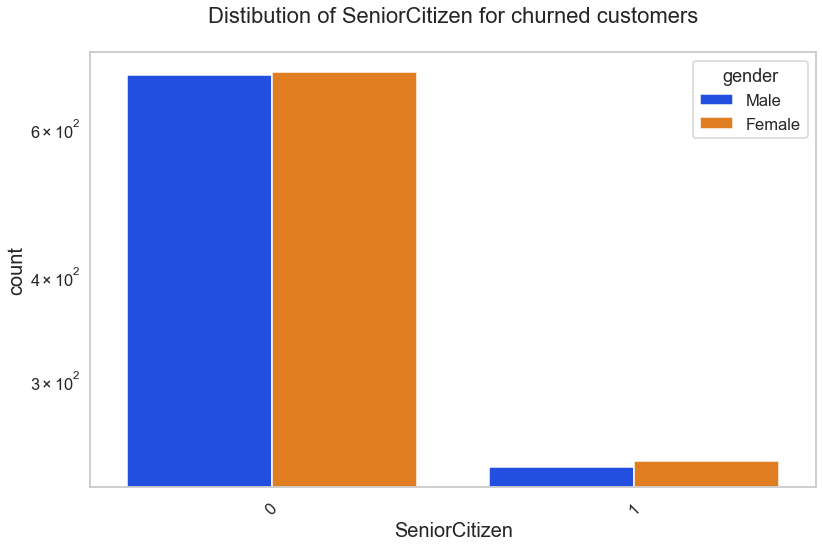

In [41]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distibution of SeniorCitizen for churned customers', hue='gender')

So from above plots we can say that:

Electronic chek medium is highest churned medium
monthaly customer are more likely to churn
Non senior citizen are highly churned

# Modelling

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score

In [43]:
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


# Seprating the Dependent and Independent variables

In [44]:
x = new_df_dummies.drop("Churn",axis=1)
y = new_df_dummies["Churn"]

In [45]:
x.shape

(7032, 50)

In [46]:
y.shape

(7032,)

In [47]:
from imblearn.over_sampling import BorderlineSMOTE
xr,yr = BorderlineSMOTE().fit_resample(x,y)
print('original target dataset shape:',y.shape)
print('resample target dataset shape:',yr.shape)

original target dataset shape: (7032,)
resample target dataset shape: (10326,)


<AxesSubplot:xlabel='Churn', ylabel='count'>

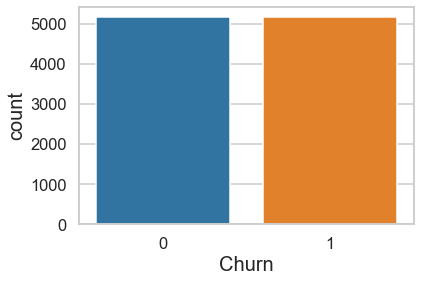

In [48]:
sns.countplot(yr)

Now our data is balanced

In [49]:
x_train,x_test,y_train,y_test = train_test_split(xr,yr,test_size=0.2)

# Decision tree classifier

In [50]:
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
DTC_predicted = DTC.predict(x_test)
print(confusion_matrix(y_test, DTC_predicted))
print(classification_report(y_test, DTC_predicted))
print(accuracy_score(y_test, DTC_predicted))

[[874 195]
 [193 804]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1069
           1       0.80      0.81      0.81       997

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

0.8121974830590513


# RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC_predicted = RFC.predict(x_test)
print(confusion_matrix(y_test, RFC_predicted))
print(classification_report(y_test, RFC_predicted))
print(accuracy_score(y_test, RFC_predicted))

[[928 141]
 [174 823]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1069
           1       0.85      0.83      0.84       997

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

0.8475314617618587


# KN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_predicted = knn.predict(x_test)
print(confusion_matrix(y_test, knn_predicted))
print(classification_report(y_test, knn_predicted))
print(accuracy_score(y_test, knn_predicted))

[[750 319]
 [129 868]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      1069
           1       0.73      0.87      0.79       997

    accuracy                           0.78      2066
   macro avg       0.79      0.79      0.78      2066
weighted avg       0.79      0.78      0.78      2066

0.7831558567279767


# AdaBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
adb_predicted = adb.predict(x_test)
print(confusion_matrix(y_test, adb_predicted))
print(classification_report(y_test, adb_predicted))
print(accuracy_score(y_test, adb_predicted))

[[889 180]
 [125 872]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1069
           1       0.83      0.87      0.85       997

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

0.8523717328170377


# Bagging Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc_predicted = bgc.predict(x_test)
print(confusion_matrix(y_test, bgc_predicted))
print(classification_report(y_test, bgc_predicted))
print(accuracy_score(y_test, bgc_predicted))

[[952 117]
 [198 799]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1069
           1       0.87      0.80      0.84       997

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

0.8475314617618587


# Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_predicted = bgc.predict(x_test)
print(confusion_matrix(y_test, gbc_predicted))
print(classification_report(y_test, gbc_predicted))
print(accuracy_score(y_test, gbc_predicted))

[[952 117]
 [198 799]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1069
           1       0.87      0.80      0.84       997

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

0.8475314617618587


as we can see accuracy score of adaboost classider is high so we will go with that

# Report of GradientBoostingClassifier

In [56]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
x_train1=pca.fit_transform(x_train,y_train)
x_test1=pca.fit_transform(x_test)


In [57]:
model_pca=AdaBoostClassifier(n_estimators=100,random_state=100)

In [58]:
model_pca.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=100)

In [59]:
yr_pred_pca=model_pca.predict(x_test)

<AxesSubplot:>

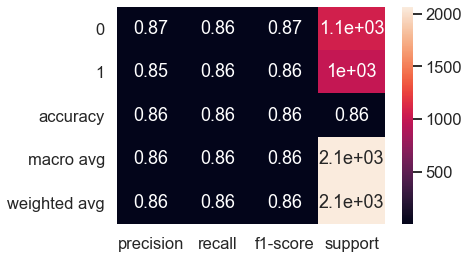

In [60]:
classification_rep=classification_report(y_test,yr_pred_pca,output_dict=True)
sns.heatmap(pd.DataFrame(classification_rep).T, annot=True)

In [61]:
from sklearn.metrics import roc_auc_score , roc_curve
print("roc auc score::",roc_auc_score(y_test, yr_pred_pca))

roc auc score:: 0.8621040858778394


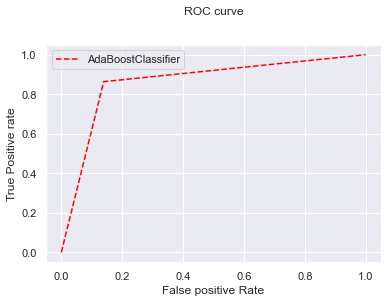

In [62]:
fpr1, tpr1, thresh1 = roc_curve(y_test, yr_pred_pca,pos_label=1)
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='AdaBoostClassifier')
plt.title('ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [63]:
import joblib
joblib.dump(yr_pred_pca,"customer_churn_analysis.pkl")

['customer_churn_analysis.pkl']